In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import math
import os
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from icecream import ic
from sklearn.datasets import load_iris
import zipfile as zp
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [2]:
heart_dis_df=pd.read_csv("D:/HALDEN/downloads/logistic_regression_dataset.csv")
ic(heart_dis_df.shape)
heart_dis_df.head(10)

ic| heart_dis_df.shape: (4238, 17)


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1.0
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0.0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0.0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0.0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0.0


In [15]:
heart_dis_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [14]:
heart_dis_df['education'].fillna(heart_dis_df['education'].mean(),inplace=True)
heart_dis_df['cigsPerDay'].fillna(heart_dis_df['cigsPerDay'].mean(),inplace=True)
heart_dis_df['BPMeds'].fillna(heart_dis_df['BPMeds'].mean(),inplace=True)
heart_dis_df['totChol'].fillna(heart_dis_df['totChol'].mean(),inplace=True)
heart_dis_df['BMI'].fillna(heart_dis_df['BMI'].mean(),inplace=True)
heart_dis_df['glucose'].fillna(heart_dis_df['glucose'].mean(),inplace=True)
heart_dis_df['TenYearCHD'].fillna(heart_dis_df['TenYearCHD'].mean(),inplace=True)
heart_dis_df['heartRate'].fillna(heart_dis_df['heartRate'].mean(),inplace=True)

there were alot of null values so to reduce that, filling them with thier mean value looked like the most probable solution instead of dropping them because dropping the rows may leave the model with a scanty dataset to to train  and test and may ultimately cause the model to be less accurate


In [16]:
heart_dis_df.dropna(axis=0)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.00000,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.802008,90.0,80.000000,1.000000
1,1,36,4.00000,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.000000,0.000000
2,2,46,1.00000,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.000000,0.000000
3,3,50,1.00000,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.000000,1.000000
4,4,64,1.00000,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4233,46,3.00000,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.420000,63.0,77.000000,0.150737
4234,4234,58,2.00000,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.080000,65.0,70.000000,0.150737
4235,4235,55,1.00000,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.410000,120.0,81.966753,0.150737
4236,4236,45,3.00000,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.860000,75.0,92.000000,0.150737


In [17]:
heart_dis_df['sex']=heart_dis_df['sex'].map({'M':1,'F':0})

In [18]:
heart_dis_df['is_smoking']=heart_dis_df['is_smoking'].map({'YES':1,"NO":0})

In [19]:
heart_dis_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.00000,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.802008,90.0,80.000000,1.000000
1,1,36,4.00000,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.000000,0.000000
2,2,46,1.00000,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.000000,0.000000
3,3,50,1.00000,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.000000,1.000000
4,4,64,1.00000,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4233,46,3.00000,0,0,0.0,0.0,0,0,0,277.0,122.5,77.5,27.420000,63.0,77.000000,0.150737
4234,4234,58,2.00000,0,0,0.0,0.0,0,0,0,190.0,132.0,67.0,23.080000,65.0,70.000000,0.150737
4235,4235,55,1.00000,1,0,0.0,0.0,0,0,0,199.0,134.0,80.0,26.410000,120.0,81.966753,0.150737
4236,4236,45,3.00000,0,0,0.0,0.0,0,1,0,231.0,157.5,104.5,22.860000,75.0,92.000000,0.150737


In [26]:
corr_matrix=heart_dis_df.corr()
corr_matrix['TenYearCHD'].sort_values(ascending=False)

TenYearCHD         1.000000
age                0.201649
sysBP              0.192422
prevalentHyp       0.149579
diaBP              0.122763
glucose            0.120194
diabetes           0.092631
totChol            0.085034
BPMeds             0.078495
sex                0.075781
prevalentStroke    0.064358
BMI                0.060045
cigsPerDay         0.059455
is_smoking         0.030538
heartRate          0.018000
id                 0.007058
education         -0.046519
Name: TenYearCHD, dtype: float64

In [27]:
X=heart_dis_df.drop(['TenYearCHD','id','education'],axis=1)

In [28]:
X

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.802008,90.0,80.000000
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.000000
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.000000
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.000000
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,46,0,0,0.0,0.0,0,0,0,277.0,122.5,77.5,27.420000,63.0,77.000000
4234,58,0,0,0.0,0.0,0,0,0,190.0,132.0,67.0,23.080000,65.0,70.000000
4235,55,1,0,0.0,0.0,0,0,0,199.0,134.0,80.0,26.410000,120.0,81.966753
4236,45,0,0,0.0,0.0,0,1,0,231.0,157.5,104.5,22.860000,75.0,92.000000


In [29]:
y=heart_dis_df['TenYearCHD']

In [36]:
y=round(y)


In [39]:
y=list(map(lambda x: int(x),y))

In [41]:
y=pd.DataFrame(y,)

In [42]:
y

,0
0,1
1,0
2,0
3,1
4,0
...,...
4233,0
4234,0
4235,0
4236,0


In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)  

In [44]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\HALDEN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HALDEN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred=logreg.predict(x_test)
ic(logreg.score(x_test,y_test))

ic| logreg.score(x_test,y_test): 0.8650943396226415


0.8650943396226415

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      1.00      0.93       915
           1       1.00      0.01      0.03       145

    accuracy                           0.87      1060
   macro avg       0.93      0.51      0.48      1060
weighted avg       0.88      0.87      0.80      1060



Text(50.722222222222214, 0.5, 'True')

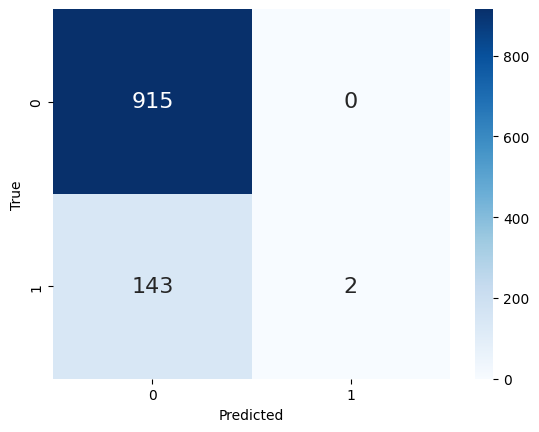

In [47]:
confusion_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_mat,annot=True,fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

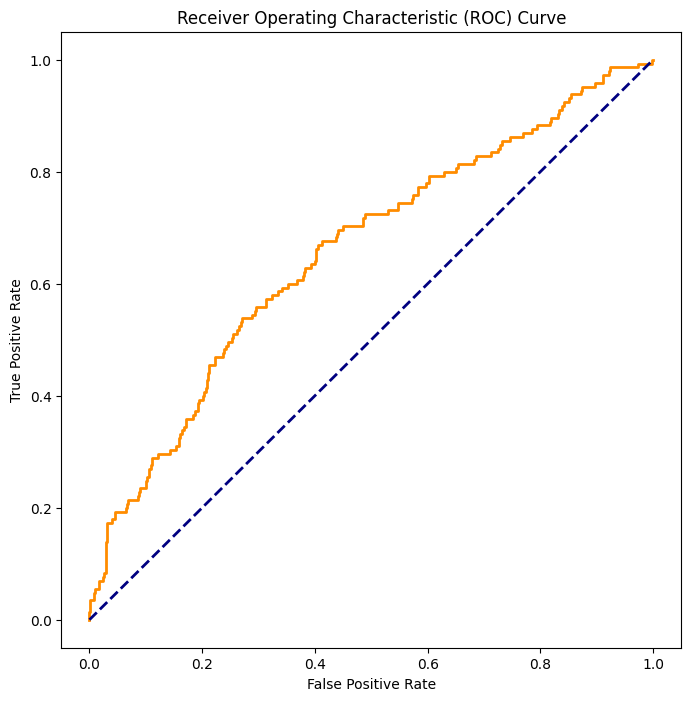

In [48]:
from sklearn.metrics import roc_curve,auc
y_pred_prob =logreg.predict_proba(x_test)[:, 1]  


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')